In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [74]:
df_b7_init = pd.read_csv('44009_clean.csv')
df_b8_init = pd.read_csv('44065_clean.csv')

In [75]:
def plot_df(df, x,y1, y2, title="", xlabel='Date', dpi=100):
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1)
    ax1.set_ylabel('Windspeed')
    #plt.setp(fig, rotation=90)
    plt.xticks(rotation=90)
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'r-')
    ax2.set_ylabel('Pressure', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

In [129]:

keep_col = ['day','month','datetime','waveperiod','waveheight','WindDir','windspeed','pressure','possibility','hurrthreat']
df_b7 = df_b7_init[keep_col]
df_b8=df_b8_init[keep_col]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



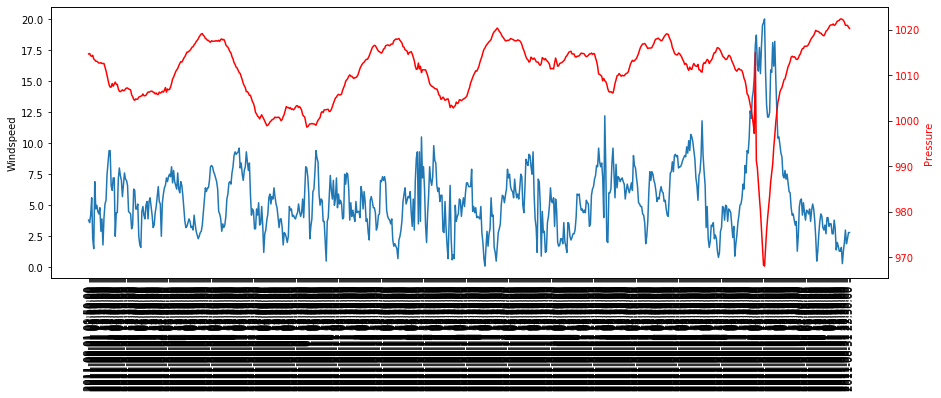

In [130]:
rs_09 = df_b7.loc[ (df_b7['month']==8)] #& ( (df_b7['day']==27) | (df_b7['day']==28) | (df_b7['day']==29) )]rs_09['date'] = rs_09['datetime'].astype('datetime64[ns]')
rs_09['date'] = rs_09['datetime'].astype('datetime64[ns]')
rs_09.head()
plot_df(rs_09, x=rs_09.datetime,y1=rs_09.windspeed, y2=rs_09.pressure, title='Pressure in month of August')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



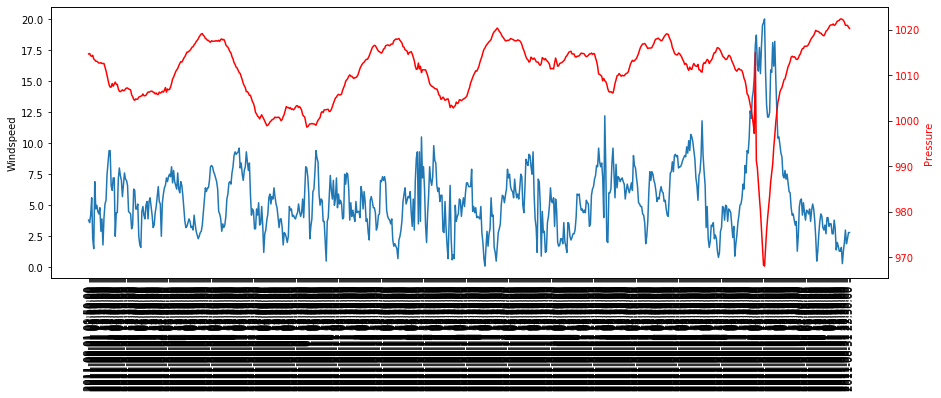

In [78]:
rs_65 = df_b8.loc[ (df_b8['month']==8)]# & ( (df_b8['day']==27) | (df_b8['day']==28) | (df_b8['day']==29) )]
rs_65['date'] = rs_65['datetime'].astype('datetime64[ns]')
rs_65.head()
plot_df(rs_65, x=rs_65.datetime,y1=rs_65.windspeed, y2=rs_65.pressure, title='Pressure in month of August')

Text(0, 0.5, 'pressure')

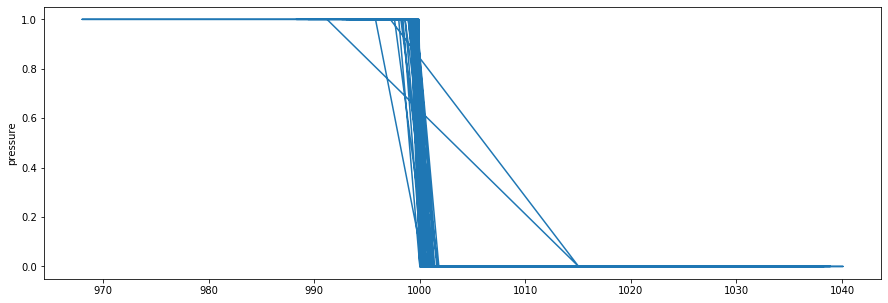

In [79]:
x=df_b7['pressure']
y1=df_b7['possibility']
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('pressure')

In [112]:
keep_col = ['day','month','waveperiod','waveheight','WindDir','windspeed','pressure']
df_b7_logit = df_b7_init[keep_col]
y1=df_b7_init['hurrthreat']

In [122]:
X_train, x_test, y_train, y_test = train_test_split(df_b7_logit, y1, test_size=0.3, random_state=0)

In [123]:
logreg = LogisticRegression()

#logit_model=sm.Logit(y_train,X_train.astype(float))

result=logreg.fit(X_train,y_train)
#print(result.summary2())

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [124]:
#keep_col_new=['pressure']
#new_x= df_b7_init[keep_col_new]
#y1=df_b7_init['hurrthreat']
#X_t, X_tes, y_t, y_tes = train_test_split(new_x, y1, test_size=0.3, random_state=0)

#model.fit(X_t, y_t)
y_pred = logreg.predict(x_test)
x_test.head()
#X_tes.iloc[3]
for i in range(len(X_tes)):
    if(y_pred[i]==1):
        print("%s, Predicted=%s" % (x_test.iloc[i], y_pred[i]))

X=day            28.00
month           8.00
waveperiod      9.05
waveheight      7.24
WindDir       138.00
windspeed      19.70
pressure      968.20
Name: 5743, dtype: float64, Predicted=1
X=day            28.00
month           8.00
waveperiod      9.69
waveheight      7.95
WindDir       180.00
windspeed      20.00
pressure      968.00
Name: 5744, dtype: float64, Predicted=1
X=day            28.00
month           8.00
waveperiod      9.27
waveheight      7.10
WindDir       120.00
windspeed      19.50
pressure      972.20
Name: 5742, dtype: float64, Predicted=1


In [127]:
df_b8_logit = df_b8_init[keep_col]
y2=df_b8_init['hurrthreat']

In [128]:
y_pred2 = logreg.predict(df_b8_logit)
for i in range(len(df_b8_logit)):
    if(y_pred2[i]==1):
        print("%s, Predicted=%s" % (df_b8_logit.iloc[i], y_pred2[i]))

day            28.00
month           8.00
waveperiod      8.78
waveheight      6.64
WindDir       119.00
windspeed      17.80
pressure      976.40
Name: 5741, dtype: float64, Predicted=1
day            28.00
month           8.00
waveperiod      9.27
waveheight      7.10
WindDir       120.00
windspeed      19.50
pressure      972.20
Name: 5742, dtype: float64, Predicted=1
day            28.00
month           8.00
waveperiod      9.05
waveheight      7.24
WindDir       138.00
windspeed      19.70
pressure      968.20
Name: 5743, dtype: float64, Predicted=1
day            28.00
month           8.00
waveperiod      9.69
waveheight      7.95
WindDir       180.00
windspeed      20.00
pressure      968.00
Name: 5744, dtype: float64, Predicted=1
day            28.00
month           8.00
waveperiod      8.74
waveheight      5.91
WindDir       197.00
windspeed      15.70
pressure      972.00
Name: 5745, dtype: float64, Predicted=1
day             31.00
month           10.00
waveperiod       8.92